In [1]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Cargar los datos en un dataframe llamado: airbnb

In [2]:
airbnb<-read.csv('data//airbnb.csv',sep = ',')

Mostrar las primeras 6 filas del dataframe

In [3]:
head(airbnb, 6)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [4]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")

In [5]:
colnames(airbnb)<-newnames

In [6]:
colnames(airbnb)

[1] "CodigoPostal"   "Barrio"         "TipoPropiedad"  "TipoAlquiler"  
 [5] "MaxOcupantes"   "NumBanyos"      "NumDormitorios" "NumCamas"      
 [9] "TipoCama"       "Comodidades"    "PiesCuadrados"  "Precio"        
[13] "Puntuacion"

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [7]:
airbnb$MetrosCuadrados<-(airbnb$PiesCuadrados*0.092903)
airbnb

CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA,NA
28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
28004,Universidad,House,Private room,7,5,1,7,Real Bed,"Internet,Wireless Internet,Kitchen,Smoking allowed,Heating,Fire extinguisher,Shampoo,Lock on bedroom door,Hangers,Hair dryer,Iron,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,77,NA
28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA
28015,Universidad,Apartment,Entire home/apt,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,translation missing: en.hosting_amenity_49",700,90,98,65.03210


In [8]:
#Para comprobar que está bien hecho
head(na.omit(airbnb[,c("PiesCuadrados","MetrosCuadrados")]))

,PiesCuadrados,MetrosCuadrados
,<int>,<dbl>
5,538,49.98181
9,700,65.03210
11,40,3.71612
15,646,60.01534
25,753,69.95596
46,269,24.99091


Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [9]:
airbnb$CodigoPostal[airbnb$CodigoPostal==''] <-NA
airbnb$CodigoPostal[airbnb$CodigoPostal=='-'] <-NA
airbnb$CodigoPostal[airbnb$CodigoPostal=='28'] <-NA
airbnb$CodigoPostal[airbnb$CodigoPostal=='28002\n28002'] <-28002
airbnb$CodigoPostal[airbnb$CodigoPostal=='2804'] <-28004
airbnb$CodigoPostal[airbnb$CodigoPostal=='2805'] <-28005
airbnb$CodigoPostal[airbnb$CodigoPostal=='28051\n28051'] <-28051
airbnb$CodigoPostal[airbnb$CodigoPostal=='2815'] <-28015
airbnb$CodigoPostal[airbnb$CodigoPostal=='2015'] <-28015
airbnb$CodigoPostal[airbnb$CodigoPostal=='280013'] <-28013
airbnb$CodigoPostal[!grepl("^28", airbnb$CodigoPostal)] <- NA

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [10]:
unique(airbnb$CodigoPostal)

[1] 28004 28015 28013 28005 28012 28014 28045 <NA>  28007 28028 28009 28001
[13] 28006 28010 28002 28034 28050 28008 28011 28049 28038 28053 28047 28025
[25] 28019 28024 28016 28036 28046 28039 28020 28003 28029 28054 28041 28026
[37] 28058 28018 28030 28017 28027 28043 28033 28055 28021 28032 28037 28022
[49] 28042 28094 28035 28040 28031 28044 28105 28023 28051 28850 28048 28056
[61] 28060 28052
77 Levels:  - 20013 20126 2015 25008 27004 27013 28 28001 280013 ... Madrid 28004

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [11]:
topCP <-count(airbnb, airbnb$CodigoPostal)
head(arrange(topCP, desc(n)), 5) 
head(arrange(topCP, n), 5)

Warning message:
“Factor `airbnb$CodigoPostal` contains implicit NA, consider using `forcats::fct_explicit_na`”


airbnb$CodigoPostal,n
<fct>,<int>
28012,2060
28004,1795
28005,1195
28013,1020
28014,630


airbnb$CodigoPostal,n
<fct>,<int>
28048,1
28052,1
28056,1
28058,1
28060,1


¿Cuales son los barrios que hay en el código postal 28012?

In [12]:
CP <- (filter(airbnb, CodigoPostal == 28012))
unique(CP$Barrio)

[1] Sol             Acacias         Palos de Moguer Embajadores    
 [5] Cortes          Palacio         Universidad     Delicias       
 [9] Arapiles        Atocha          Goya           
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... Zofío

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postao 28012? Asumiendo que el identificador de Barrio sea correcto, ¿es fiable la columna de código postal?

In [13]:
df_28012 <-arrange(count(CP, CP$Barrio), desc(n))
colnames(df_28012)<-c("Barrio", "Conteo")
df_28012

distinct <- (filter(airbnb, Barrio == "Sol"))
distinct(distinct, Barrio, CodigoPostal)

distinct2 <- (filter(airbnb, Barrio == "Cortes"))
distinct(distinct2, Barrio, CodigoPostal)

Barrio,Conteo
<fct>,<int>
Embajadores,1449
Sol,301
Cortes,216
Palos de Moguer,46
Palacio,27
Acacias,13
Universidad,4
Arapiles,1
Atocha,1


Barrio,CodigoPostal
<fct>,<fct>
Sol,28013
Sol,28005
Sol,28012
Sol,28014
Sol,NA
Sol,28004
Sol,28016
Sol,28034
Sol,28015


Barrio,CodigoPostal
<fct>,<fct>
Cortes,28012
Cortes,28014
Cortes,28004
Cortes,28013
Cortes,NA
Cortes,28033
Cortes,28008


*El campo código postal no es fiable ya que, cogiendo el ejemplo de los barrios Sol y Cortes, observamos múltiples códigos postales. Para el barrio Cortes, el correcto sería el 28014*

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [14]:
df_uniq <- unique(airbnb$Barrio)
   length(df_uniq)

unique(airbnb$Barrio)

[1] 125

[1] Universidad                  Sol                         
  [3] Imperial                     Acacias                     
  [5] Chopera                      Delicias                    
  [7] Palos de Moguer              Embajadores                 
  [9] Cortes                       Atocha                      
 [11] Pacífico                     Adelfas                     
 [13] Estrella                     Ibiza                       
 [15] Jerónimos                    Niño Jesús                  
 [17] Palacio                      Justicia                    
 [19] Recoletos                    Goya                        
 [21] Fuente del Berro             Arapiles                    
 [23] Trafalgar                    Almagro                     
 [25] Guindalera                   Lista                       
 [27] Castellana                   El Viso                     
 [29] Prosperidad                  Valverde                    
 [31] Casa de Campo                El Goloso                   
 [33] Numancia                     Cármenes                    
 [35] Puerta del Angel             Lucero                      
 [37] Aluche                       San Isidro                  
 [39] Campamento                   Comillas                    
 [41] Opañel                       Vista Alegre                
 [43] Ciudad Jardín                Hispanoamérica              
 [45] Nueva España                 Castilla                    
 [47] Bellas Vistas                Cuatro Caminos              
 [49] Castillejos                  Vallehermoso                
 [51] Almenara                     Valdeacederas               
 [53] Berruguete                   Gaztambide                  
 [55] Rios Rosas                   Peñagrande                  
 [57] Argüelles                    Puerta Bonita               
 [59] Buenavista                   Abrantes                    
 [61] Orcasur                      San Fermín                  
 [63] Almendrales                  Pradolongo                  
 [65] Portazgo                     Entrevías                   
 [67] San Diego                    Palomeras Bajas             
 [69] Fontarrón                    Vinateros                   
 [71] Ventas                       Pueblo Nuevo                
 [73] Quintana                     Concepción                  
 [75] San Juan Bautista            Costillares                 
 [77] Piovera                      Canillas                    
 [79] Pinar del Rey                Apostol Santiago            
 [81] San Andrés                   Valdefuentes                
 [83] Butarque                     Los Angeles                 
 [85] Casco Histórico de Vicálvaro Simancas                    
 [87] Rejas                        Salvador                    
 [89] Casco Histórico de Barajas   Pilar                       
 [91] La Paz                       Mirasierra                  
 [93] Ciudad Universitaria         Moscardó                    
 [95] Palomeras Sureste            Marroquina                  
 [97] Media Legua                  Los Rosales                 
 [99] Casco Histórico de Vallecas  Timón                       
[101] Corralejos                   Cuatro Vientos              
[103] Colina                       San Cristobal               
[105] Alameda de Osuna             Aeropuerto                  
[107] Palomas                      Zofío                       
[109] Aguilas                      Legazpi                     
[111] Fuentelareina                Aravaca                     
[113] Ambroz                       Canillejas                  
[115] Valdezarza                   Amposta                     
[117] San Pascual                  Santa Eugenia               
[119] Arcos                        Rosas                       
[121] Valdemarín                   El Plantío                  
[123] Hellín                       Pavones                     
[125] Orcasitas                   

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [15]:
topbarrios <- count(airbnb, airbnb$Barrio)
colnames(topbarrios)<-c("Barrio", "Entradas")
head(arrange(topbarrios, desc(Entradas)), 5)

Barrio,Entradas
<fct>,<int>
Embajadores,1844
Universidad,1358
Palacio,1083
Sol,940
Justicia,785


¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [16]:
summary(airbnb$TipoAlquiler)

Entire home/apt    Private room     Shared room 
           7903            5113             191

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


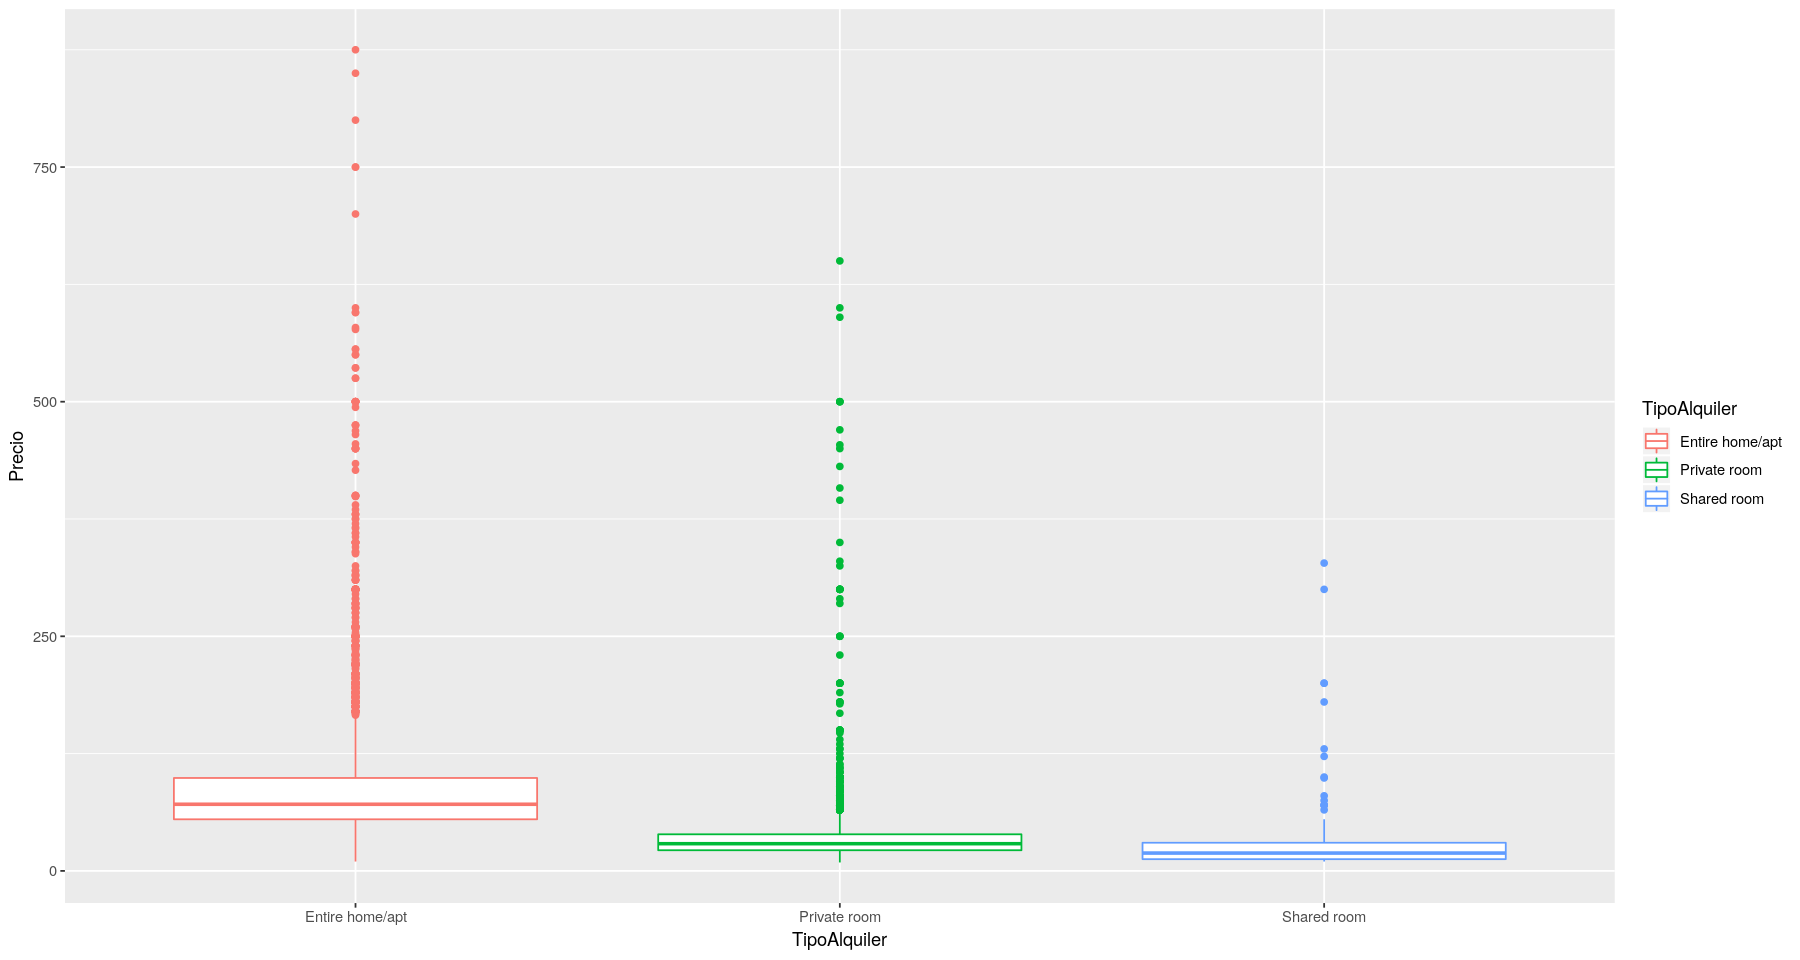

In [17]:
options(repr.plot.height=8,repr.plot.width=15) 
ggplot(data=airbnb,aes(x=TipoAlquiler, y=Precio, color=TipoAlquiler))+geom_boxplot()+
 scale_color_discrete(name="TipoAlquiler")

Cual es el precio medio de alquiler medio de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [18]:
PrivateRoom<-filter(airbnb, TipoAlquiler == 'Private room')
EntireHome<-filter(airbnb, TipoAlquiler == 'Entire home/apt')
SharedRoom<-filter(airbnb, TipoAlquiler == 'Shared room')

x <- mean(PrivateRoom$Precio, na.rm=T)
y <- mean(EntireHome$Precio, na.rm=T)
z <- mean(SharedRoom$Precio, na.rm=T)

print(paste0("El precio medio para una habitación privada es de, ",round(mean(PrivateRoom$Precio, na.rm=T),2),"€"))
print(paste0("El precio medio para un apartamento entero es de, ",round(mean(EntireHome$Precio, na.rm=T),2),"€"))
print(paste0("El precio medio para una habitación compartida es de, ",round(mean(SharedRoom$Precio, na.rm=T),2),"€"))
"-----------------------------------------------------------"
sample <- airbnb[sample (1:nrow(airbnb),5000),]
shapiro.test(sample$Precio)

"-----------------------------------------------------------"
kruskal.test(Precio~TipoAlquiler, data=airbnb)


[1] "El precio medio para una habitación privada es de, 34.26€"
[1] "El precio medio para un apartamento entero es de, 87.3€"
[1] "El precio medio para una habitación compartida es de, 29.85€"


[1] "-----------------------------------------------------------"


	Shapiro-Wilk normality test

data:  sample$Precio
W = 0.70024, p-value < 2.2e-16


[1] "-----------------------------------------------------------"


	Kruskal-Wallis rank sum test

data:  Precio by TipoAlquiler
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


*Como el p-value del test de saphiro <0.05 concluimos que los datos no siguen una distribución gaussiana por lo que utilizaremos Kruskal para comprobar si la diferencia de precios es significativa o no.*

*Como el p-value del test de Kruskal es <0.05, podemos concluir que hay diferencias significativas entre los precios de los distintos tipos de apartamento.*

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [19]:
airbnb_entire<-filter(airbnb, TipoAlquiler == 'Entire home/apt')
airbnb_entire

CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA
28015,Universidad,Apartment,Entire home/apt,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,translation missing: en.hosting_amenity_49",700,90,98,65.03210
28004,Universidad,Apartment,Entire home/apt,4,2,2,2,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Hot tub,Heating,Family/kid friendly,Washer,Dryer,Essentials,Hair dryer,Iron",NA,155,NA,NA
28004,Universidad,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Shampoo",40,70,90,3.71612


¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire

In [20]:
topairbnb_entire <-count(airbnb_entire, airbnb_entire$Barrio)
colnames(topairbnb_entire)<-c("Barrio", "Conteo")
head(arrange(topairbnb_entire, desc(Conteo)), 5)

Barrio,Conteo
<fct>,<int>
Embajadores,1228
Universidad,984
Palacio,769
Sol,701
Cortes,574


¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [21]:
PrecioMedio <- (aggregate(Precio~Barrio,airbnb_entire,mean,na.rm=TRUE))
colnames(PrecioMedio)<-c("Barrio", "PrecioMedio")
PrecioMedio[,-1] <-round(PrecioMedio[,-1],2)
Mayorprecio <-head(arrange(PrecioMedio, desc(PrecioMedio)), 5)
Mayorprecio

,Barrio,PrecioMedio
,<fct>,<dbl>
1,Palomas,309.75
2,Fuentelareina,180.00
3,Recoletos,161.93
4,El Plantío,150.00
5,Castellana,141.39


In [22]:
print(paste0("El precio medio total de los 5 barrios con mayor precio medio de alquiler es de ",round(mean(Mayorprecio$PrecioMedio),2),"€"))

[1] "El precio medio total de los 5 barrios con mayor precio medio de alquiler es de 188.61€"


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [23]:
# Conteo de los barrios y nuevos nombres de las columnas
df_barrios <- count(airbnb, airbnb$Barrio)
colnames(df_barrios)<-c("Barrio", "Freq")

# Merge con el df airbnb_entire añadiendo el precio medio de cada barrio, así cada uno solo aparece una vez
total <- merge(PrecioMedio,df_barrios,by="Barrio")
total <- (total[,c("Barrio", "PrecioMedio", "Freq")])
head(total)

,Barrio,PrecioMedio,Freq
,<fct>,<dbl>,<int>
1,Abrantes,46.00,18
2,Acacias,68.16,145
3,Adelfas,68.73,51
4,Aeropuerto,38.00,6
5,Aguilas,54.50,15
6,Alameda de Osuna,138.75,24


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [24]:
total100 <- filter(total, Freq > 100)
topprecio <- total100[,c("Barrio", "PrecioMedio", "Freq")]
TOP5<-head(arrange(topprecio, desc(PrecioMedio)), 5)
TOP5

,Barrio,PrecioMedio,Freq
,<fct>,<dbl>,<int>
1,Recoletos,161.93,172
2,Goya,111.34,229
3,Almagro,109.19,155
4,Ibiza,102.62,105
5,Sol,100.75,940


Dibuja el diagrama de densidad de distribución de los diferentes precios

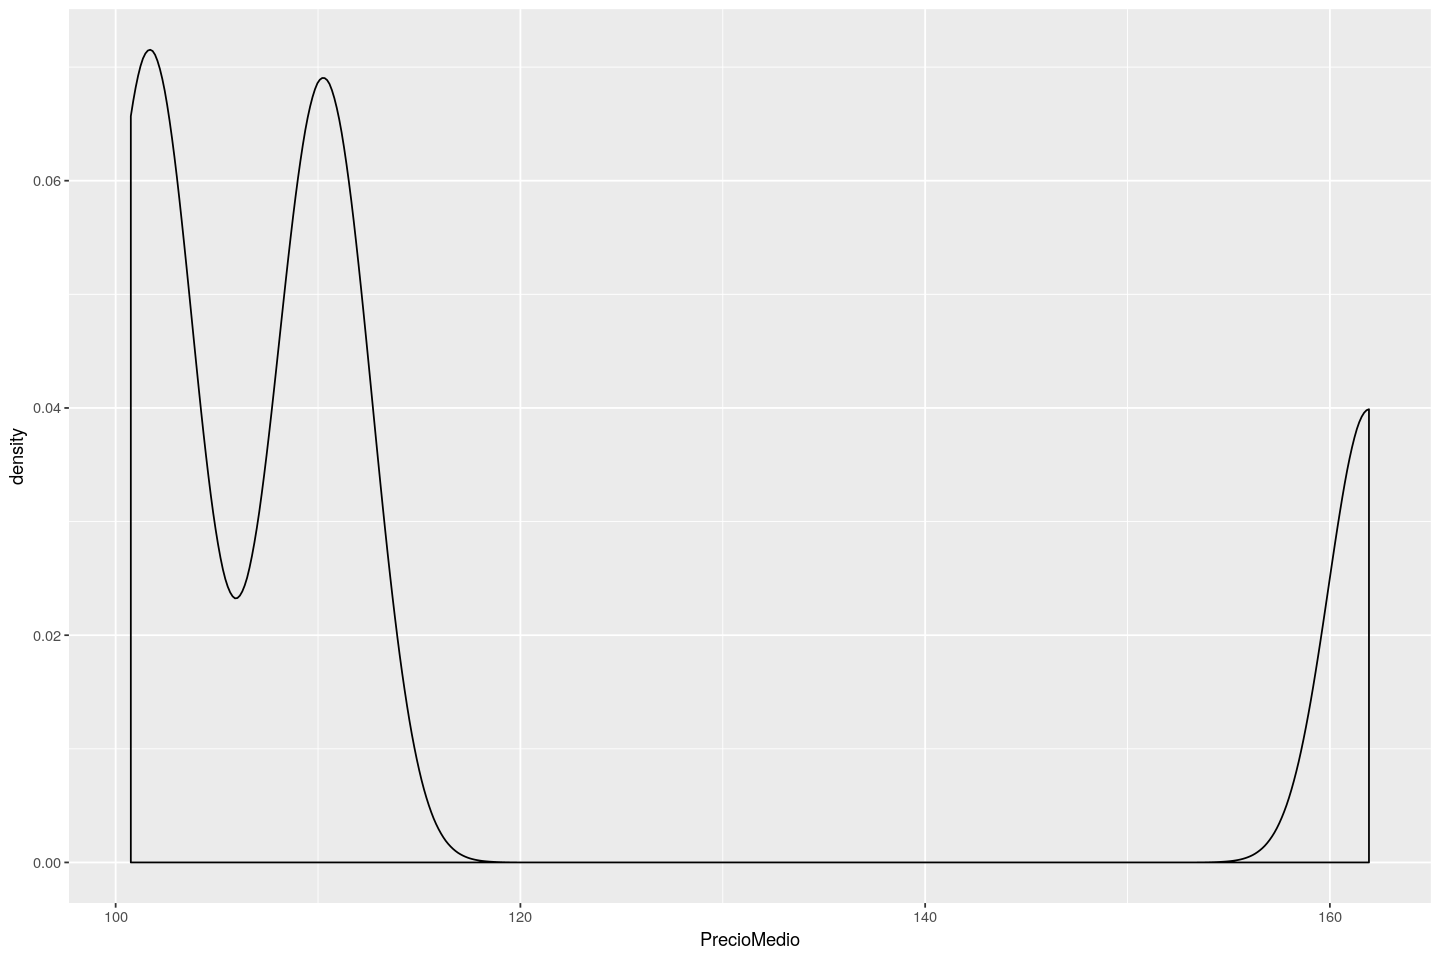

In [25]:
options(repr.plot.height=8,repr.plot.width=12)
ggplot(data=TOP5, aes(x=PrecioMedio)) + geom_density(bw=2)
  

*En el diagrama se muestra el precio medio de los 5 barrios más caros con apartamentos enteros.*

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [26]:
# creamos df con la media por barrio de metros cuadrados
M2medio <- (aggregate(MetrosCuadrados~Barrio,airbnb_entire,mean,na.rm=TRUE))
colnames(M2medio) <-c("Barrio", "MetrosCuadrados")
M2medio[,-1] <-round(M2medio[,-1],2)

# Hacemos un left join con el df TOP5 para quedarnos solo con los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.
TOP5m2<- merge(x=TOP5,y=M2medio, by ="Barrio",all.x=TRUE)
TOP5m2

Barrio,PrecioMedio,Freq,MetrosCuadrados
<fct>,<dbl>,<int>,<dbl>
Almagro,109.19,155,0.00
Goya,111.34,229,51.69
Ibiza,102.62,105,NA
Recoletos,161.93,172,26.66
Sol,100.75,940,45.62


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


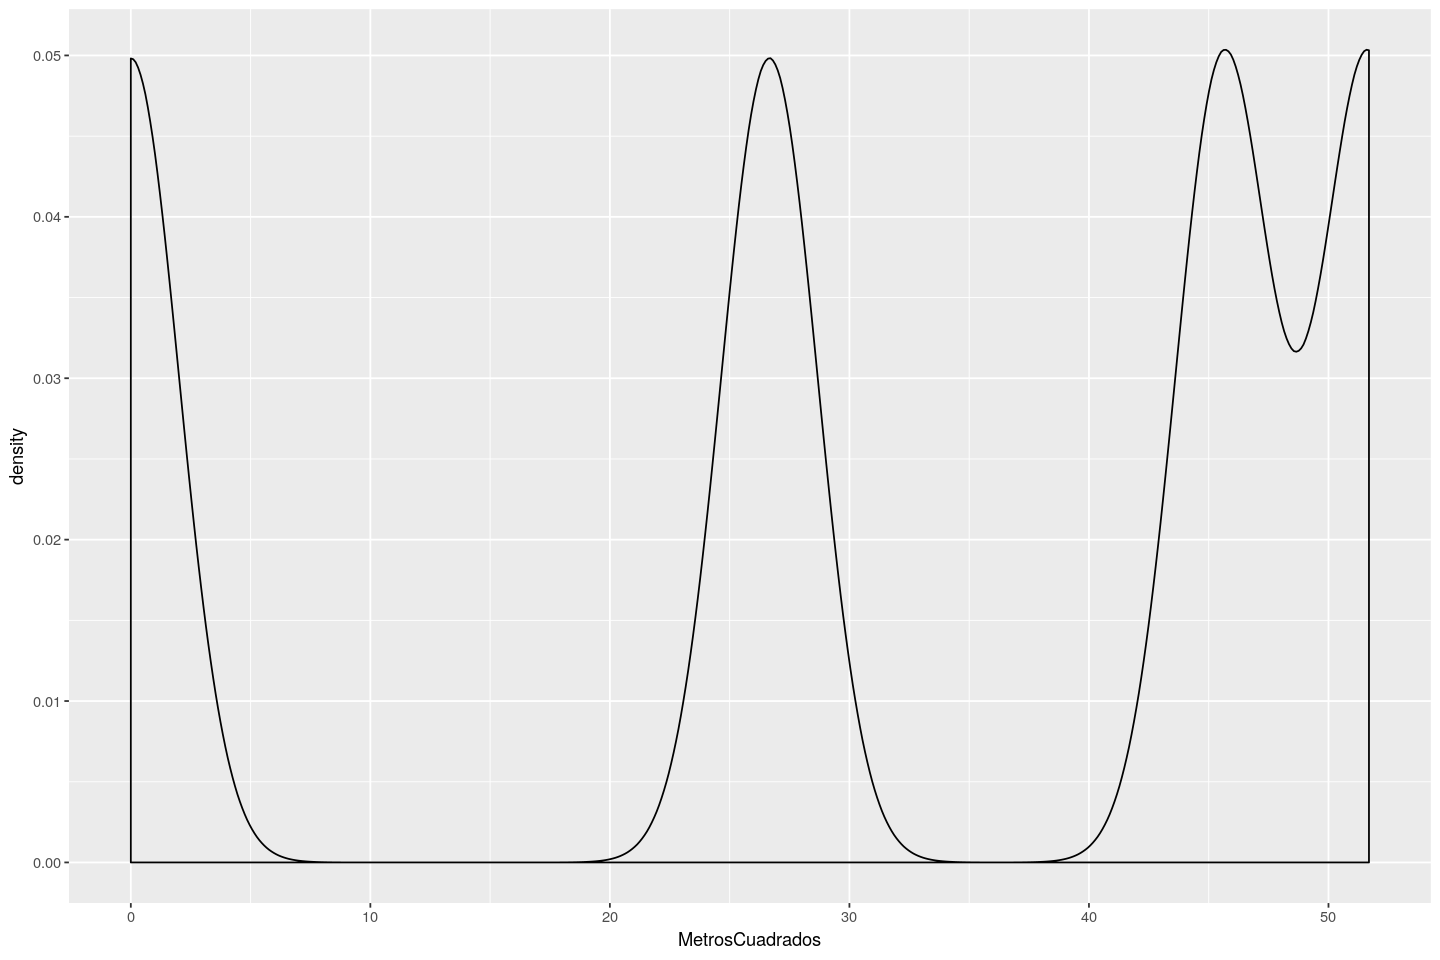

In [27]:
options(repr.plot.height=8,repr.plot.width=12)
ggplot(data=TOP5m2, aes(x=MetrosCuadrados)) + geom_density(bw=2)

*En el diagrama se muestra los metros cuadrados medios de los 4 barrios más caros con apartamentos enteros. No hay datos para el barrio Ibiza.*

Esta claro que las medias de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [28]:
kruskal.test(MetrosCuadrados~Barrio, data=TOP5m2)


	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 3, df = 3, p-value = 0.3916


*Como el p-value es >0.05, podemos concluir que no hay diferencias significativas entre las medidas de los barrios.*

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [29]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")

In [30]:
model<-lm(data=barrio_sol, formula = Precio ~ NumBanyos+NumDormitorios+MaxOcupantes+MetrosCuadrados)
summary(model)


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.852 -15.599  -4.021  10.042 108.406 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     42.28673   10.25650   4.123 0.000127 ***
NumBanyos       15.70888   10.15721   1.547 0.127701    
NumDormitorios  22.75344    6.55828   3.469 0.001022 ** 
MaxOcupantes    -2.85045    2.60279  -1.095 0.278223    
MetrosCuadrados  0.29900    0.09997   2.991 0.004155 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.42 on 55 degrees of freedom
  (641 observations deleted due to missingness)
Multiple R-squared:  0.6108,	Adjusted R-squared:  0.5825 
F-statistic: 21.58 on 4 and 55 DF,  p-value: 9.534e-11


Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [31]:
Cor <- cor(cbind(barrio_sol$NumBanyos, barrio_sol$NumDormitorios, barrio_sol$MaxOcupantes, barrio_sol$MetrosCuadrados), use="complete")
rownames(Cor) = colnames(Cor) = c("NumBanyos", "NumDormitorios", "MaxOcupantes", "MetrosCuadrados")
Cor

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.6873719,0.7017290,0.4820549
NumDormitorios,0.6873719,1.0000000,0.7853809,0.5684521
MaxOcupantes,0.7017290,0.7853809,1.0000000,0.4286233
MetrosCuadrados,0.4820549,0.5684521,0.4286233,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


Warning message:
“Removed 641 rows containing non-finite values (stat_density).”


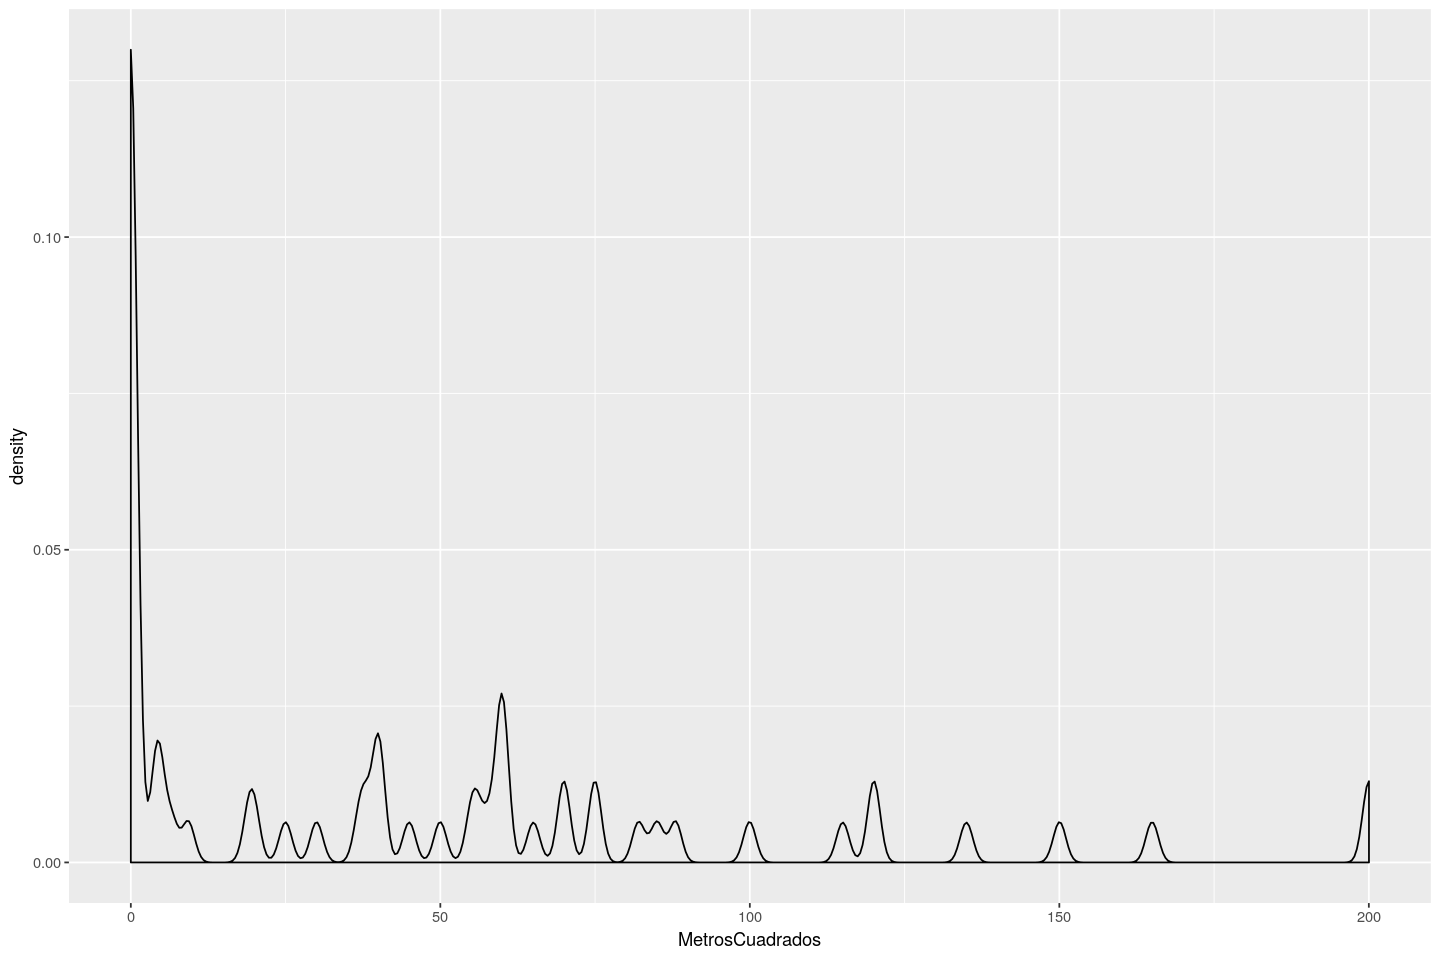

In [32]:
options(repr.plot.height=8,repr.plot.width=12)
ggplot(data=barrio_sol, aes(x=MetrosCuadrados)) + geom_density(bw=1)

*Hay apartamentos con 0m2, lo cual no tiene sentido, así que nos quedaremos con los apartamentos > 0m2.*

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [33]:
barrio_sol <- filter(barrio_sol, MetrosCuadrados > 0)
model<-lm(data=barrio_sol, formula = Precio ~ NumBanyos+NumDormitorios+MaxOcupantes+MetrosCuadrados)
summary(model)


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-78.612 -15.964  -2.284  15.983  69.387 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      32.5859    10.7807   3.023 0.004666 ** 
NumBanyos         0.7013    13.4708   0.052 0.958778    
NumDormitorios   29.8080     7.3856   4.036 0.000281 ***
MaxOcupantes      1.9376     3.9943   0.485 0.630634    
MetrosCuadrados   0.1880     0.1578   1.192 0.241398    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.48 on 35 degrees of freedom
Multiple R-squared:  0.7562,	Adjusted R-squared:  0.7284 
F-statistic: 27.14 on 4 and 35 DF,  p-value: 2.666e-10


*El valor que mejor nos permitirá obtener el precio de un inmueble será el número de dormitorios, ya que su p-value es más bajo. Además, el número de * indica el grado de confianza de la variable.*

¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [34]:
# El mejor estimador será aquel que tenga una probabilidad mayor de dar un valor cercano al correcto. La varianza de un estimador nos dice cuan de fiable, o cuanto error, nuestro estimador puede tener.
model1<-lm(data=barrio_sol, formula = Precio ~ NumDormitorios)
summary(model1)
"--------------------------------------------------------------------------------------------"
model2<-lm(data=barrio_sol, formula = Precio ~ MetrosCuadrados)
summary(model2)


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-88.277 -15.644  -4.069  19.931  62.723 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      40.767      7.646   5.332 4.69e-06 ***
NumDormitorios   39.302      3.799  10.344 1.32e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.33 on 38 degrees of freedom
Multiple R-squared:  0.7379,	Adjusted R-squared:  0.731 
F-statistic:   107 on 1 and 38 DF,  p-value: 1.321e-12


[1] "--------------------------------------------------------------------------------------------"


Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.175 -21.635  -6.466  20.533 128.270 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      46.5709    10.3852   4.484 6.55e-05 ***
MetrosCuadrados   0.8342     0.1229   6.786 4.80e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.53 on 38 degrees of freedom
Multiple R-squared:  0.5479,	Adjusted R-squared:  0.536 
F-statistic: 46.05 on 1 and 38 DF,  p-value: 4.795e-08


*Comparando los R2 de los modelos vemos que el del número de dormitorios es mayor, lo que hace que el modelo sea más fiable. Además, el p-value en este caso también es menor.*

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [35]:
model2$coefficients
confint(model2)

(Intercept) MetrosCuadrados 
     46.5709212       0.8341799

,2.5 %,97.5 %
(Intercept),25.5471054,67.594737
MetrosCuadrados,0.5853331,1.083027


*Se espera que aumente 0.83€. Con un margen inferior de 0.59€ y uno superior de 1€*

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [36]:
model1$coefficients
confint(model1)

(Intercept) NumDormitorios 
      40.76678       39.30201

,2.5 %,97.5 %
(Intercept),25.28828,56.24528
NumDormitorios,31.61069,46.99334


*Se espera que aumente 39.30€. Con un margen inferior de 31.61€ y uno superior de 46.99€*

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el margen de error de esa probabilidad?

In [37]:
table(barrio_sol$NumDormitorios)
binom.test(3,40)


 0  1  2  3  4  5 
 4 21  8  3  2  2 


	Exact binomial test

data:  3 and 40
number of successes = 3, number of trials = 40, p-value = 1.947e-08
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.01574218 0.20386475
sample estimates:
probability of success 
                 0.075 


*La probabilidad de encontrar un apartamento con 3 dormitorios es de 0.075% con un intervalo de confianza de [0.016% - 0.2%]*